In [15]:
import numpy as np 
from IPython.display import Image

In [7]:
def define_basisFor1Q():
    vec1Q = {}
    vec1Q['0'] = np.array([[1],[0]])
    vec1Q['1'] = np.array([[0],[1]])
    return vec1Q


In [8]:
def define_basisFor2Q(vec1q):
    vec2Q = {}
    vec2Q['00'] = np.kron(vec1q['0'],vec1q['0'])
    vec2Q['01'] = np.kron(vec1q['0'],vec1q['1'])
    vec2Q['10'] = np.kron(vec1q['1'],vec1q['0'])
    vec2Q['11'] = np.kron(vec1q['1'],vec1q['1'])
    return vec2Q
    

In [9]:
def define_basisFor3Q(vec1q, vec2q):
    vec3q={}
    vec3q['000'] = np.kron(vec1q['0'],vec2q['00'])
    vec3q['111'] = np.kron(vec1q['1'],vec2q['11'])
    vec3q['100'] = np.kron(vec1q['1'],vec2q['00'])
    vec3q['010'] = np.kron(vec1q['0'],vec2q['10'])
    vec3q['001'] = np.kron(vec1q['0'],vec2q['01'])
    vec3q['110'] = np.kron(vec1q['1'],vec2q['10'])
    vec3q['011'] = np.kron(vec1q['0'],vec2q['11'])
    vec3q['101'] = np.kron(vec1q['1'],vec2q['01'])

    # for key, value in vec3q.items():
    #     print(key, value)
    return vec3q 
    

def DefineIndexTable3Qubit2(vec3q):
    idxInVec3q = {}
    for key, vec in vec3q.items():
        idx = [i for i in range(vec.shape[0]) if vec[i]==1]
        idxInVec3q[idx[0]] = key
    return idxInVec3q 
    
# print(idxInVec3q)
# print(vec3q)



In [49]:
# define gates 
# H for Hadamard gate 
# X for X gate 
# I for identity gate 

nqubit = 3
N = np.power(2,nqubit)

H = np.matrix('1 1; 1 -1')
X = np.matrix('0 1; 1 0')
Z = np.matrix('1 0; 0 -1')
H = H/np.sqrt(2)
I = np.matrix('1 0; 0 1')
I2 = np.kron(I,I)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
X2 = np.kron(X,X)
X3 = np.kron(X,X2)

#matrix for XCC gate,
# 011 -> 111 & 111  -> 011
XCC = np.kron(I,I2)
XCC[7,7] = 0
XCC[3,7] = 1
XCC[7,3] = 1
XCC[3,3] = 0

print('XCC=')
print(XCC)

vec1q = define_basisFor1Q()
vec2q = define_basisFor2Q(vec1q)
vec3q = define_basisFor3Q(vec1q,vec2q)
idxInVec3q = DefineIndexTable3Qubit2(vec3q)

XCC=
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


In [71]:
def ExpressInState(Psi):
    coeff = np.abs(Psi).max()
    Psi = Psi/coeff

    idx = [i for i in range(Psi.shape[0]) if np.abs(Psi[i])==1]
    vec = []
    for i in idx:
        if Psi[i] < 0: 
            vec.append('-' + idxInVec3q[i])
        else:
            vec.append(idxInVec3q[i])

    vec.append('=> Prob = '+str(np.square(coeff)))
    print(vec)
    

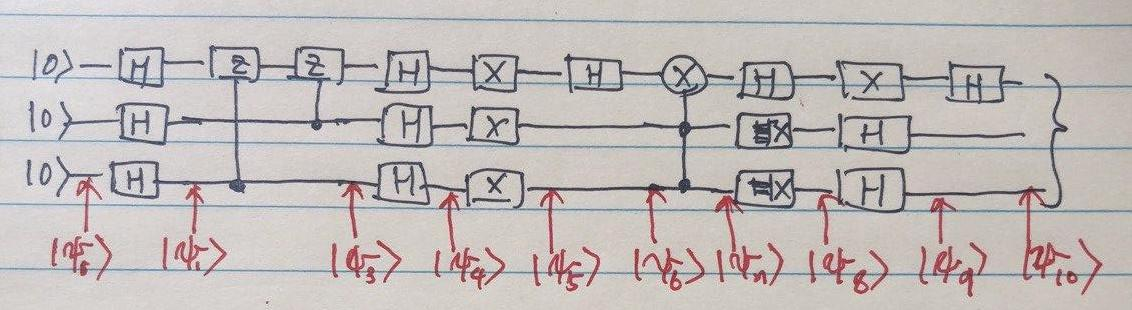

In [76]:
display(Image(filename='/Users/gimoonnam/myGit/notRepos/QC/GroversAlgorithm/figs/3qubit_circuit_Of_GroverAlgorithm.jpg', width=700))

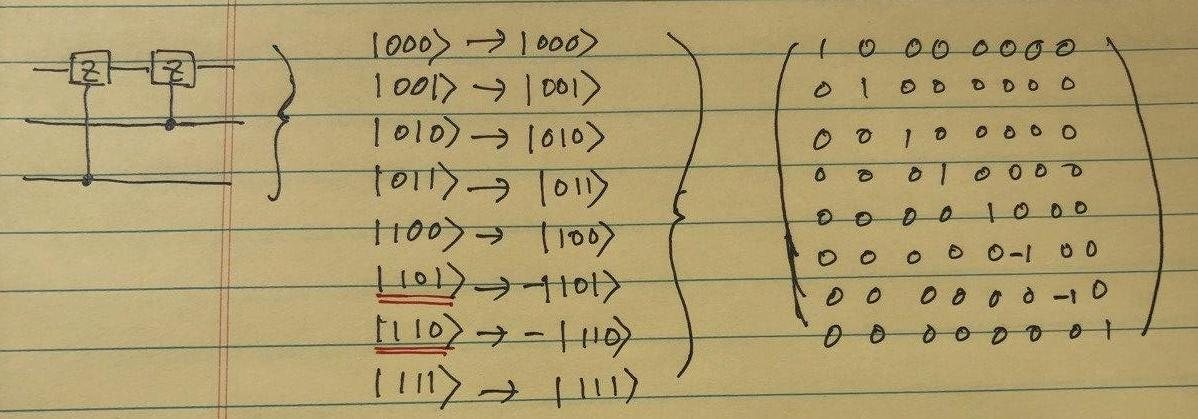

[[ 1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]


In [73]:
#create a matrix for the two Z, Z gates as shown below 
display(Image(filename='/Users/gimoonnam/myGit/notRepos/QC/GroversAlgorithm/figs/Z-CZC-.jpg', width=700))

ZZgate = np.concatenate((vec3q['000'],vec3q['001'],vec3q['010'],
                         vec3q['011'],vec3q['100'],-vec3q['101'],-vec3q['110'],vec3q['111']),axis=1)
print(ZZgate)


## Trace of evolution of state function by passing through gates 

Finally, we get the two marked states |101> and |110> with an equal probability of 0.5, which can be obtained in $\Psi_{10}$ below

In [77]:


Psi_0 = vec3q['000']
Psi_1 = np.matmul(H3,Psi_0)

Psi_3 = np.matmul(ZZgate,Psi_1)
print("Psi_3: ")
ExpressInState(Psi_3)
print("\n")

Psi_4 = np.matmul(H3,Psi_3)
print("Psi_4: "); ExpressInState(Psi_4); print("\n")

Psi_5 = np.matmul(X3, Psi_4)
print("Psi_5: ")
ExpressInState(Psi_5)
print("\n")

HII = np.kron(H,I2)
Psi_6 = np.matmul(HII, Psi_5)
print("Psi_6:"); ExpressInState(Psi_6); print("\n")

Psi_7 = np.matmul(XCC, Psi_6)
print("Psi_7: ")
ExpressInState(Psi_7)
print("\n")

HXX = np.kron(H,X2)
Psi_8 = np.matmul(HXX, Psi_7)
print("Psi_8: ")
ExpressInState(Psi_8)
print("\n")

XHH = np.kron(X,H2)
Psi_9 = np.matmul(XHH, Psi_8)
print("Psi_9: ")
ExpressInState(Psi_9)
print("\n")

Psi_10 = np.matmul(HII,Psi_9)
print("Psi_10: ")
ExpressInState(Psi_10)
print("Get the two marked states!!!")



Psi_3: 
['000', '001', '010', '011', '100', '-101', '-110', '111', '=> Prob = 0.12499999999999994']


Psi_4: 
['000', '011', '100', '-111', '=> Prob = 0.24999999999999978']


Psi_5: 
['-000', '011', '100', '111', '=> Prob = 0.24999999999999978']


Psi_6:
['011', '-100', '=> Prob = 0.49999999999999944']


Psi_7: 
['-100', '111', '=> Prob = 0.49999999999999944']


Psi_8: 
['000', '-011', '-100', '111', '=> Prob = 0.24999999999999967']


Psi_9: 
['-001', '-010', '101', '110', '=> Prob = 0.24999999999999956']


Psi_10: 
['-101', '-110', '=> Prob = 0.49999999999999895']
Get the two marked states!!!
